#### About Fisher's Iris data set
This dataset tabulates paramateres of different flower species along with species names itself. 
Overall dataset has 5 parameters.
#### Load datasets
Use function loadtxt() numpy library to load from csv file. 
Note that one of the parameters is a string type, so we have to set dtype to str.
We will require 5 different lists that store individual property values from the dataset.

In [37]:
import numpy as np

data_set = np.loadtxt("datasets/IRIS.csv", dtype = str, delimiter = ",", unpack = True)#
sepal_length, sepal_width, petal_length, petal_width, species = data_set
#print("Species: ", species)
#print("Petal length", petal_length)


#### Simple data plot 
Use matplotlib.pyplot module to plot various data plots.

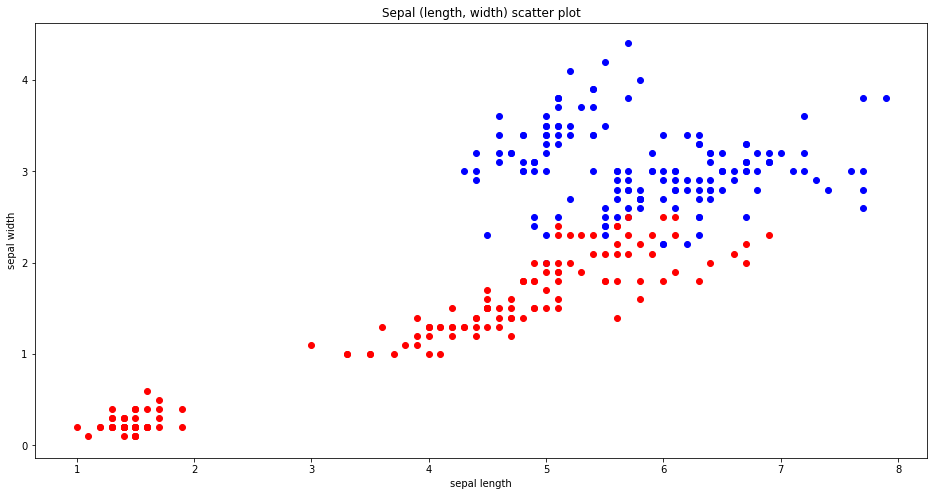

In [40]:
import matplotlib.pyplot as pl

# Make plot a bit bigger
# adapted from https://www.youtube.com/watch?v=Uf2UR9nCyVY&feature=youtu.be
pl.rcParams['figure.figsize']=(16,8)
# plots x vs y scatter plot
pl.scatter(sepal_length, sepal_width, c = "blue")
pl.scatter(petal_length, petal_width, c = "red")
pl.xlabel('sepal length')
pl.ylabel('sepal width')
pl.title('Sepal (length, width) scatter plot')
pl.show()